<font color='blue'><h2>Multiclass Classification</h2></font>

<font color='red'>
Note: on matrix dot product
    $$ X_{m \times n} \cdot W_{p \times q} = O_{m \times q} $$</font>

Now, We know binary classification, What if number class is more than two classes to classify

Logistics function can easily handled binary classification as it's output between [0, 1], We need function that can able to distribute the result between n classes, and maximum distribution will be output class

Introducing one more activation function which is softmax

$$ Softmax = \frac{e^{h_i}}{\sum_k e^{h_k}}$$

where:
$$ h = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + .. + \theta_n x_n = \theta^T X $$

Input $\theta^T X$ to softmax to get probability matrix where each row will contains probailities for each classess

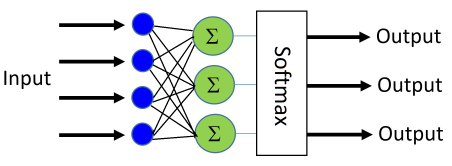

### Optimization

Now we need minimized the cost $J(\theta)$ using optimized algorithm

Here we take cross-entropy as cost function

$$ Cost= J(\theta) =  - \sum_{i=1}^{n} T_i \cdot log(O_i)$$

Compute the gradient of $\nabla_\theta J(\theta)$

Using chain rule will differentiate binary entropy


$$\frac{d J(\theta)}{d\theta} = \frac{d J(\theta)}{dz} \cdot \frac{dz}{dh} \cdot \frac{dh}{d\theta} \qquad \text{where z = $\frac{e^{h_i}}{(\sum_{k}e^{h_k})}$  $\qquad$ h = $\theta^T x$} \qquad equation(*)$$ </font>

$$\nabla_\theta J(\theta) = - \frac{1}{n} \sum_{i=1}^{n} [X^i \cdot (T_i - O_i)]$$

<font color='green'>__Repeat__:
    {
    $$\theta_j: \theta_j - \alpha \cdot \nabla_\theta J(\theta) \qquad \alpha \text{ is learning rate}$$
    }</font>

In [1]:
# Import required methods
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_digits
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
# Define Softmax
def softmax(h):
    return np.exp(h) / np.sum(np.exp(h) ,axis=1, keepdims=True)

# Define Loss
def cross_entropy(O, T):
    return - np.sum(T * np.log(O), axis=1)

# Define overall loss
def _cost(cross_entropy,l2, w_):
    L2_term = l2 * np.sum(w_ ** 2)
    cross_entropy = cross_entropy + L2_term
    return 0.5 * np.mean(cross_entropy)

In [3]:
# Define Minibatches
def yield_minibatches_idx(rgen, n_batches, data_ary, shuffle=True):
        indices = np.arange(data_ary.shape[0])

        if shuffle:
            indices = rgen.permutation(indices)
        if n_batches > 1:
            remainder = data_ary.shape[0] % n_batches

            if remainder:
                minis = np.array_split(indices[:-remainder], n_batches)
                minis[-1] = np.concatenate((minis[-1],
                                            indices[-remainder:]),
                                           axis=0)
            else:
                minis = np.array_split(indices, n_batches)

        else:
            minis = (indices,)

        for idx_batch in minis:
            yield idx_batch

In [4]:
# Define gradient descent for softmax regression
def new_gradient(X, y, eta, itern, l2=0.0, random_state=None):
    
    _score = []
    _loss = []
    _bias = []
    _weight = []
    
    nfeature, nclassess = X.shape[1], len(np.unique(y))
    
    rgen = np.random.RandomState(random_state)
    w = rgen.normal(loc=0.0, scale=0.01, size=(nfeature, nclassess)) # initalized weight and bias
    b = np.zeros(shape=nclassess)

    
    y_enc = np.zeros((y.size, len(np.unique(y))))
    y_enc[np.arange(y.size),y] = 1
    y_enc = y_enc.astype('float64')

    for epoch in range(itern):
        
        for idx in list(yield_minibatches_idx(rgen, 1, data_ary=Xtrain)):
            Xt ,yt, y_enct  = X[idx], y[idx], y_enc[idx]
            
            h = Xt.dot(w) + b
            Output = softmax(h)

            yhat= Output.argmax(axis=1)
            _score.append(accuracy_score(yt, yhat))

            diff = Output - y_enct

            grad = Xt.T.dot(diff)

            _weight.append(w)
            w -= (eta * grad + eta * l2* w)

            _bias.append(b)
            b -= (eta * np.sum(diff, axis=0))
            
        # compute cost of the whole epoch
        z = X.dot(w) + b
        O = softmax(z)

        entropy = cross_entropy(O, y_enc)
        cost  = _cost(entropy, l2, w)
        _loss.append(cost)

    return _weight, _bias, _loss, _score, diff

In [5]:
# iris = load_iris()
digits = load_digits() # Load Data

<font color='purple'><h3>Look @ Data</h3></font>

(-0.5, 7.5, 7.5, -0.5)

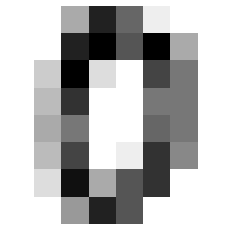

In [6]:
plt.imshow(digits.data.reshape((1797,8,8))[0], cmap=plt.cm.gray_r)
plt.axis('off')

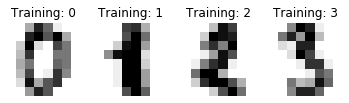

In [7]:
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [8]:
digits.images.shape

(1797, 8, 8)

In [9]:
# X, y= iris.data, iris.target
X, y= digits.data, digits.target  # get data into X,y form

In [10]:
X = StandardScaler().fit_transform(X) # Scale the data using Z-score

<font color='purple'><h3>Split Data Into Train & Test</h3></font>

In [11]:
index = np.random.randint(0,len(y), int(len(y)*0.3)) # create index id

Xtrain, Xtest = np.delete(X, index, axis=0) , X[index] # subset based on index id for train
ytrain, ytest = np.delete(y, index, axis=0) , y[index] # subset based on index id for validation

In [12]:
print(Xtrain.shape, ytrain.shape) # Verify the shape of data

(1334, 64) (1334,)


<font color='blue'><h3># Train model and Validate on new data</h3></font>

In [13]:
%%time
coeff, bias, cost, score, diff = new_gradient(X=Xtrain, y=ytrain, eta = 0.001, itern = 75, random_state=1, l2=0.001)

Wall time: 268 ms


Text(0.5, 1.0, 'Gradient Loss Convergence')

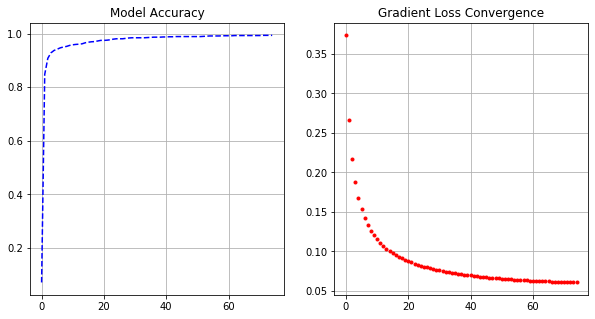

In [14]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
itern = 75
ax[0].plot(range(itern), score, 'b--')
ax[0].grid()
ax[0].set_title('Model Accuracy')

ax[1].plot(range(itern), cost, 'r.')
ax[1].grid()
ax[1].set_title('Gradient Loss Convergence')

In [15]:
idx = np.argmax(score) # Find highest score index as idx
z = Xtest.dot(coeff[idx]) + bias[idx] # calculate X.W + b
soft = softmax(z).argmax(axis=1) # Find softmax distribution and convert into labels 

<font color='purple'><h3>Confusion Matrix and Classification Report</h3></font>

Text(0.5, 1, 'Gradient Optimized Confusion Matrix With Acc 0.96')

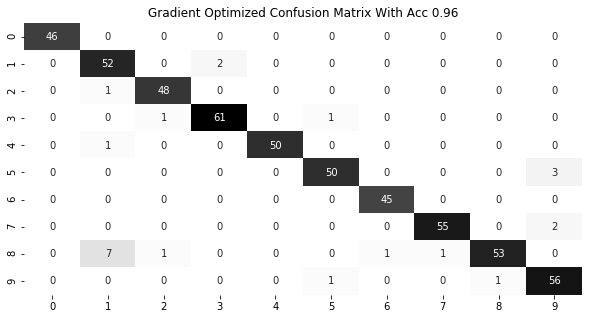

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(ytest, soft),fmt='0.0f', annot=True, cmap=plt.cm.binary, cbar=False)
plt.title('Gradient Optimized Confusion Matrix With Acc {}'.format(round(accuracy_score(ytest, soft), 2)))

In [17]:
print(classification_report(ytest, soft))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.85      0.96      0.90        54
           2       0.96      0.98      0.97        49
           3       0.97      0.97      0.97        63
           4       1.00      0.98      0.99        51
           5       0.96      0.94      0.95        53
           6       0.98      1.00      0.99        45
           7       0.98      0.96      0.97        57
           8       0.98      0.84      0.91        63
           9       0.92      0.97      0.94        58

    accuracy                           0.96       539
   macro avg       0.96      0.96      0.96       539
weighted avg       0.96      0.96      0.96       539



<font color='red'><h4>Describe The Above Metrics</h4></font>

* What is Precision and Recall ?
* How to calculate F1-score ?
* What does Precision, Recall and F1-score tells us ?

[
    name: 'Manish Singh',
    email: 'singhmanish979@yahoo.com',
    affiliation: 'Consultant'
]